# Order Delivery Time Prediction


- Name : Pavan Trivedi
- Title : Linear Regression Assignment- Delivery Time

## Objectives

The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:

- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy


## Data Pipeline

The data pipeline for this assignment will involve the following steps:

1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**


## Data Understanding

The dataset contains information on orders placed through Porter, with the following columns:

| Field                    | Description                                                                                 |
| ------------------------ | ------------------------------------------------------------------------------------------- |
| market_id                | Integer ID representing the market where the restaurant is located.                         |
| created_at               | Timestamp when the order was placed.                                                        |
| actual_delivery_time     | Timestamp when the order was delivered.                                                     |
| store_primary_category   | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol           | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items              | Total number of items in the order.                                                         |
| subtotal                 | Final price of the order.                                                                   |
| num_distinct_items       | Number of distinct items in the order.                                                      |
| min_item_price           | Price of the cheapest item in the order.                                                    |
| max_item_price           | Price of the most expensive item in the order.                                              |
| total_onshift_dashers    | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers       | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders | Number of orders pending fulfillment at the time of the order.                              |
| distance                 | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**


In [1]:
# Import essential libraries for data manipulation and analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from datetime import datetime

## **1. Loading the data**

Load 'porter_data_1.csv' as a DataFrame


In [2]:
# Importing the file porter_data_1.csv

df = pd.read_csv("porter_data_1.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>


#### **2.1 Fixing the Datatypes** <font color = red>[5 marks]</font> <br>

The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality


##### **2.1.1** <font color = red>[2 marks]</font> <br>

Convert date and time fields to appropriate data type


In [3]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

for col in ["created_at", "actual_delivery_time"]:
    df[col] = pd.to_datetime(df[col])

##### **2.1.2** <font color = red>[3 marks]</font> <br>

Convert categorical fields to appropriate data type


In [4]:
# Convert categorical features to category type

df["store_primary_category"] = df["store_primary_category"].astype("category")
df["order_protocol"] = df["order_protocol"].astype("category")
df["market_id"] = df["market_id"].astype("category")

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>

Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed


##### **2.2.1** <font color = red>[2 marks]</font> <br>

Calculate the time taken using the features `actual_delivery_time` and `created_at`


In [5]:
# Calculate time taken in minutes

df["time_taken"] = (
    df["actual_delivery_time"] - df["created_at"]
).dt.total_seconds() / 60

##### **2.2.2** <font color = red>[3 marks]</font> <br>

Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.


In [6]:
# Extract the hour and day of week from the 'created_at' timestamp

df["order_hour"] = df["created_at"].dt.hour
df["order_dow"] = df["created_at"].dt.dayofweek
ndf = df.copy()

# Create a categorical feature 'isWeekend'

df["isWeekend"] = df["order_dow"].isin([5, 6]).astype(int)

In [7]:
# Drop unnecessary columns


ndf = df.drop(columns=["created_at", "actual_delivery_time"])

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>


##### **2.3.1** <font color = red>[2 marks]</font> <br>

Define target and input features


In [8]:
# Define target variable (y) and features (X)

X = ndf.drop(columns=["time_taken"])
y = ndf["time_taken"]

##### **2.3.2** <font color = red>[3 marks]</font> <br>

Split the data into training and test sets


In [9]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>

1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights


#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [10]:
# Define numerical and categorical columns for easy EDA and data manipulation

num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns
cat_cols = [c for c in X_train.columns if c not in num_cols]

##### **3.1.1** <font color = red>[3 marks]</font> <br>

Plot distributions for numerical columns in the training set to understand their spread and any skewness


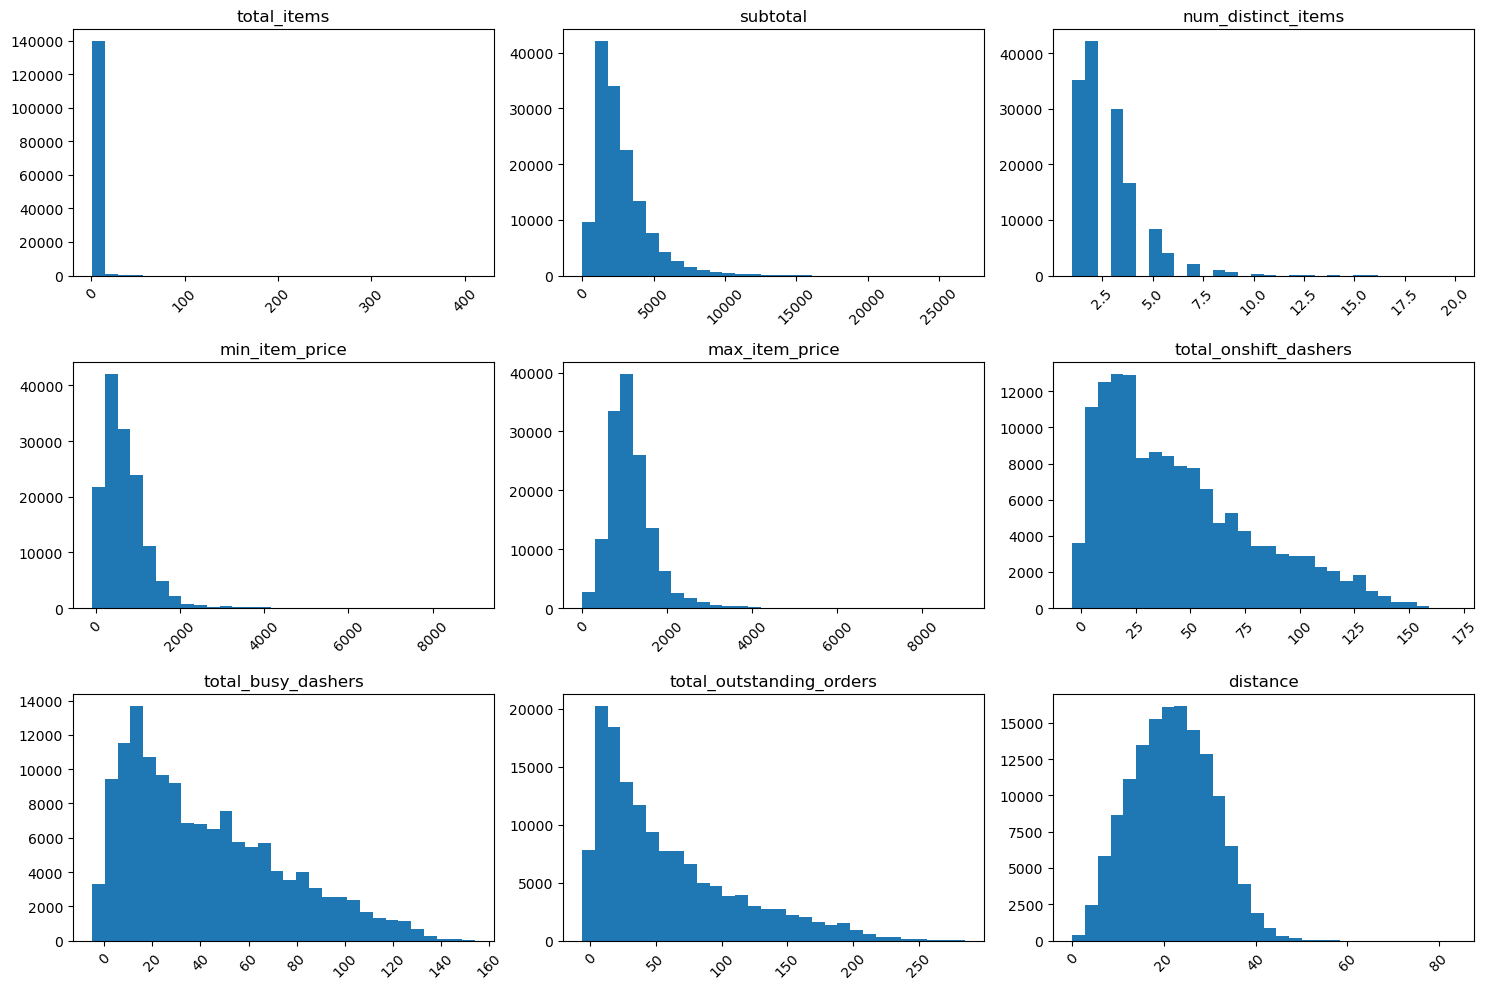

In [11]:
# Plot distributions for all numerical columns

plt.figure(figsize=(15, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    plt.hist(X_train[col], bins=30)
    plt.title(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>

Check the distribution of categorical features


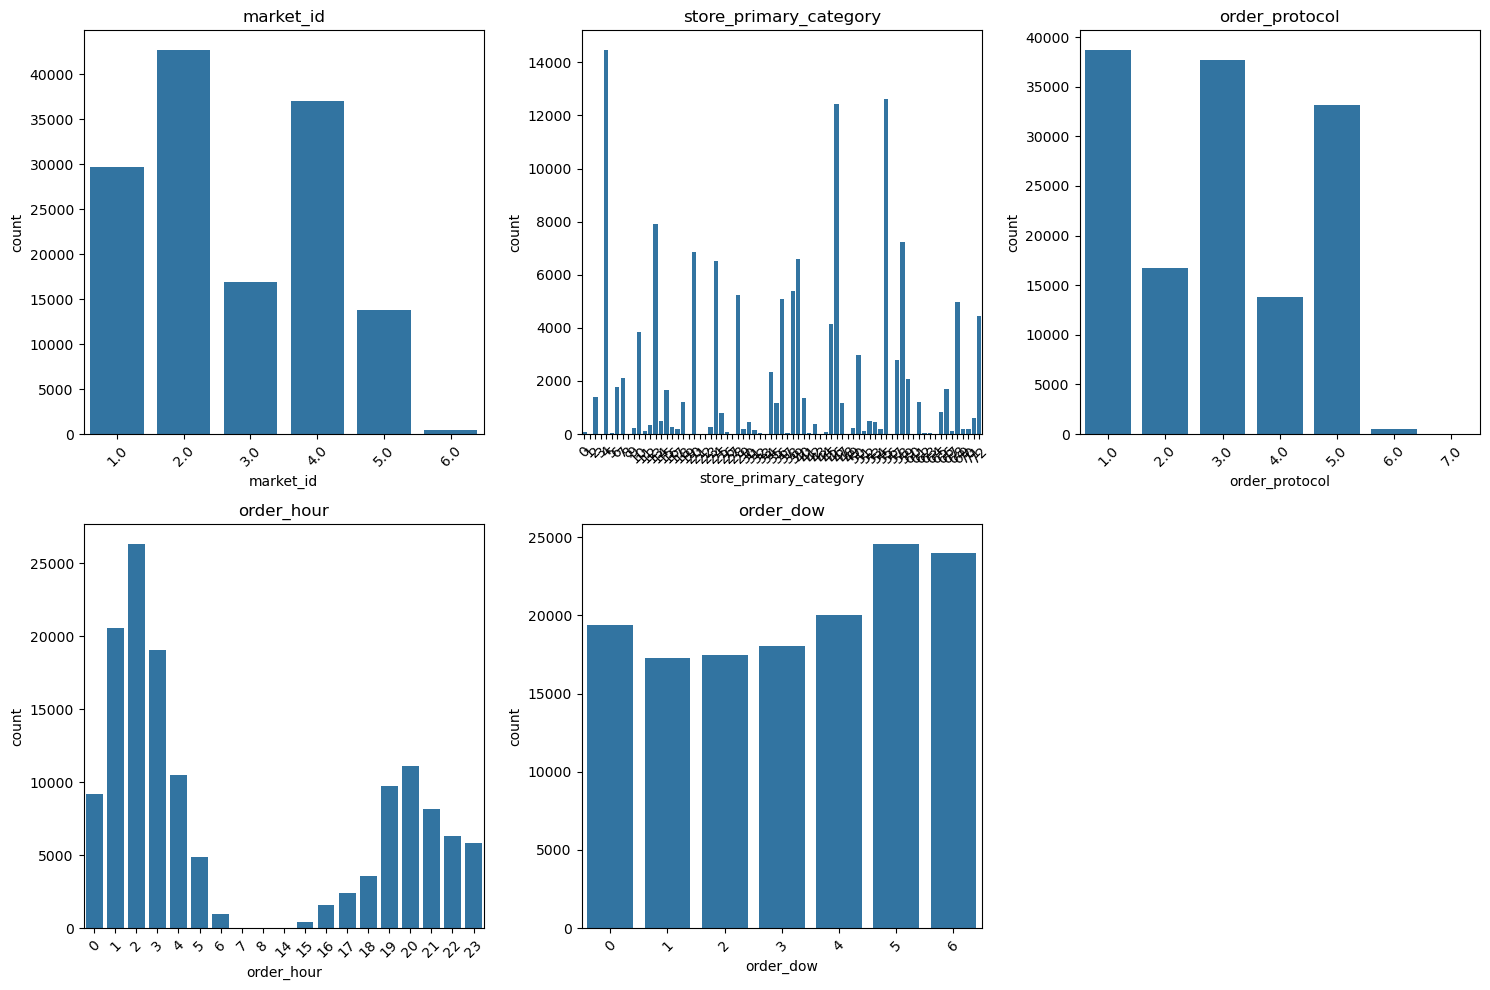

In [12]:
# Distribution of categorical columns

plt.figure(figsize=(15, 10))


for i, col in enumerate(cat_cols[:5], 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=X_train[col])
    plt.title(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>

Visualise the distribution of the target variable to understand its spread and any skewness


Text(0.5, 1.0, 'time_taken')

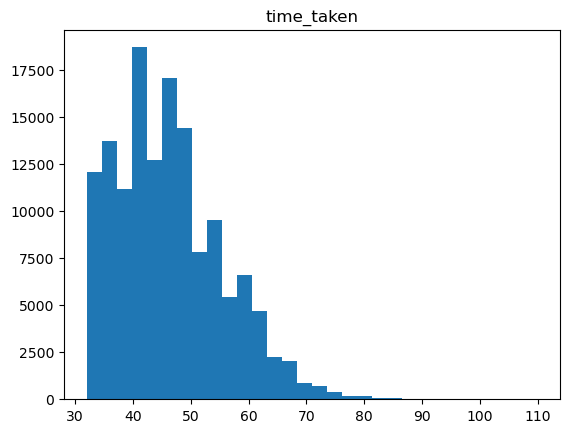

In [13]:
# Distribution of time_taken

plt.figure()
plt.hist(y_train, bins=30)
plt.title("time_taken")

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>


##### **3.2.1** <font color = red>[3 marks]</font> <br>

Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`


Text(0, 0.5, 'time_taken')

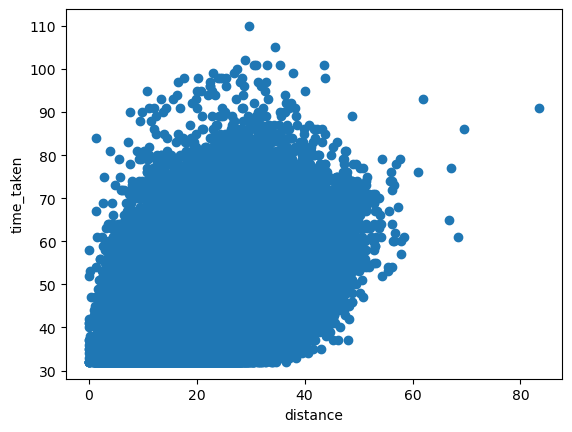

In [14]:
# Scatter plot to visualise the relationship between time_taken and other features

plt.figure()
plt.scatter(X_train["distance"], y_train)
plt.xlabel("distance")
plt.ylabel("time_taken")

Text(0, 0.5, 'time_taken')

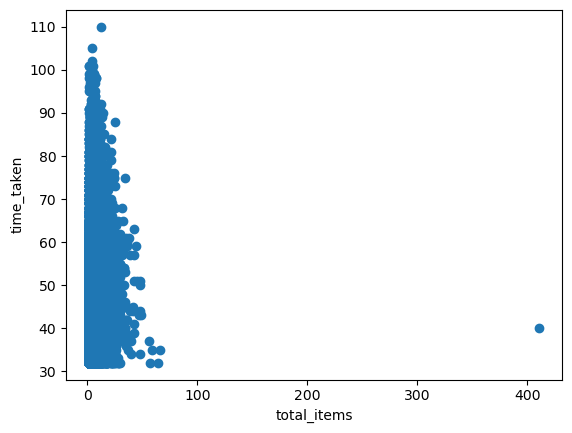

In [15]:
# Show the distribution of time_taken for different hours

plt.figure()
plt.scatter(X_train["total_items"], y_train)
plt.xlabel("total_items")
plt.ylabel("time_taken")

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>

Check correlations between numerical features to identify which variables are strongly related to `time_taken`


##### **3.3.1** <font color = red>[3 marks]</font> <br>

Plot a heatmap to display correlations


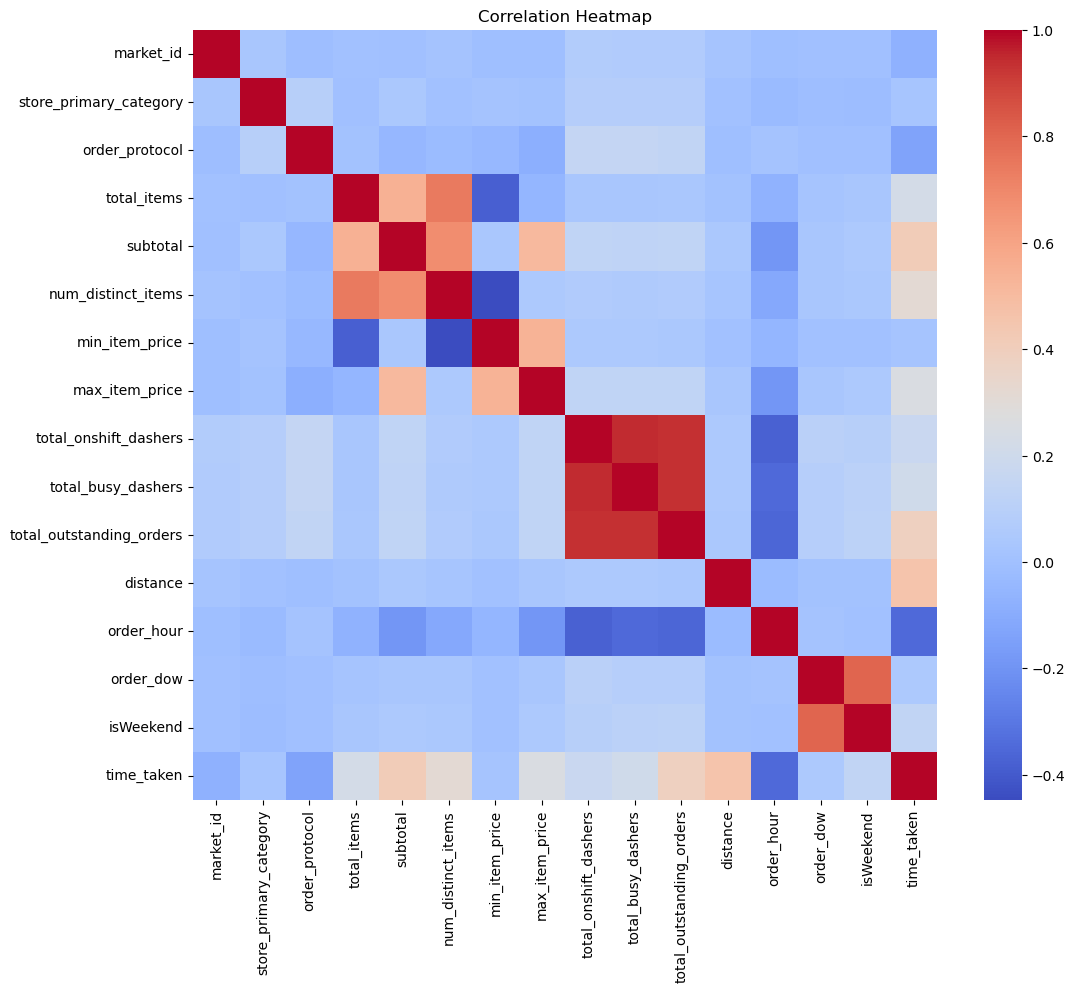

In [16]:
# Plot the heatmap of the correlation matrix

corr = pd.concat([X_train, y_train], axis=1).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>

Drop the columns with weak correlations with the target variable


In [17]:
# Drop 3-5 weakly correlated columns from training dataset

weak = corr["time_taken"].abs()[corr["time_taken"].abs() < 0.05].index.tolist()
X_train_reduced = X_train.drop(columns=weak)
X_test_reduced = X_test.drop(columns=weak)

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>


##### **3.4.1** <font color = red>[2 marks]</font> <br>

Visualise potential outliers for the target variable and other numerical features using boxplots


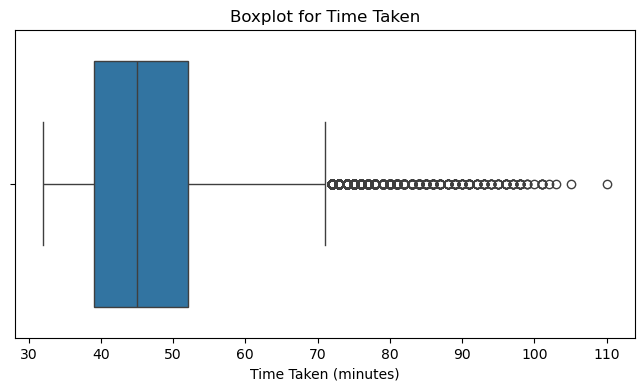

In [18]:
# Boxplot for time_taken

plt.figure(figsize=(8, 4))
sns.boxplot(x=df["time_taken"])
plt.title("Boxplot for Time Taken")
plt.xlabel("Time Taken (minutes)")
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>

Handle outliers present in all columns


In [19]:
# Handle outliers

for col in num_cols:  # Changed from numerical_cols to num_cols
    lower_bound = df[col].quantile(0.01)
    upper_bound = df[col].quantile(0.99)
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>

Optionally, perform EDA on test data to see if the distribution match with the training data


In [20]:
# Define numerical and categorical columns for easy EDA and data manipulation

#### **4.1 Feature Distributions**


##### **4.1.1**

Plot distributions for numerical columns in the validation set to understand their spread and any skewness


In [21]:
# Plot distributions for all numerical columns

##### **4.1.2**

Check the distribution of categorical features


In [22]:
# Distribution of categorical columns

##### **4.1.3**

Visualise the distribution of the target variable to understand its spread and any skewness


In [23]:
# Distribution of time_taken

#### **4.2 Relationships Between Features**

Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`


In [24]:
# Scatter plot to visualise the relationship between time_taken and other features

#### **4.3** Drop the columns with weak correlations with the target variable


In [25]:
# Drop the weakly correlated columns from training dataset

## **5. Model Building** <font color = red>[15 marks]</font> <br>


#### **Import Necessary Libraries**


In [26]:
# Import libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>


In [27]:
# Apply scaling to the numerical columns

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reduced)
X_test_scaled = scaler.transform(X_test_reduced)

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.


#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>


You can choose from the libraries _statsmodels_ and _scikit-learn_ to build the model.


In [28]:
# Create/Initialise the model

lr = LinearRegression()

In [29]:
# Train the model using the training data

rfe = RFE(lr, n_features_to_select=8)
rfe.fit(X_train_scaled, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=8)

In [30]:
# Make predictions

support = rfe.get_support()
selected_features = X_train_reduced.columns[support]
print(f"Selected features: \n {list(selected_features)}")

Selected features: 
 ['market_id', 'order_protocol', 'subtotal', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'order_hour']


In [31]:
# Find results for evaluation metrics

lr.fit(X_train_scaled[:, support], y_train)
preds = lr.predict(X_test_scaled[:, support])

print("RMSE:", np.sqrt(mean_squared_error(y_test, preds)))
print("R2 score:", r2_score(y_test, preds))

RMSE: 3.3251973406949524
R2 score: 0.873674392262854


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with _scikit-learn_.


#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>


For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.


In [32]:
# Loop through the number of features and test the model

# Initialize variables to store the best model and performance
best_num_features = 0
best_r2_score = -float("inf")
best_model = None

# Iterate over the number of features to select
for num_features in range(1, X_train_scaled.shape[1] + 1):
    lr = LinearRegression()
    rfe = RFE(lr, n_features_to_select=num_features)
    rfe.fit(X_train_scaled, y_train)

    # Evaluate the model
    preds = rfe.predict(X_test_scaled)
    r2 = r2_score(y_test, preds)

    # Update the best model if the current one is better
    if r2 > best_r2_score:
        best_r2_score = r2
        best_num_features = num_features
        best_model = rfe

print(f"Best number of features: {best_num_features}")
print(f"Best R2 score: {best_r2_score}")

Best number of features: 12
Best R2 score: 0.8807584940287122


In [33]:
# Build the final model with selected number of features

selected_features = X_train_reduced.columns[best_model.support_]
print(f"Selected features: \n{selected_features}\n")

# Train the final model
final_model = LinearRegression()
final_model.fit(X_train_scaled[:, best_model.support_], y_train)

# Evaluate the final model
final_preds = final_model.predict(X_test_scaled[:, best_model.support_])
final_rmse = np.sqrt(mean_squared_error(y_test, final_preds))
final_r2 = r2_score(y_test, final_preds)

print(f"Final RMSE: {final_rmse}")
print(f"Final R2 score: {final_r2}")

Selected features: 
Index(['market_id', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'max_item_price', 'total_onshift_dashers',
       'total_busy_dashers', 'total_outstanding_orders', 'distance',
       'order_hour', 'isWeekend'],
      dtype='object')

Final RMSE: 3.2306168399976816
Final R2 score: 0.8807584940287122


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>


#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>


Text(0, 0.5, 'Residuals')

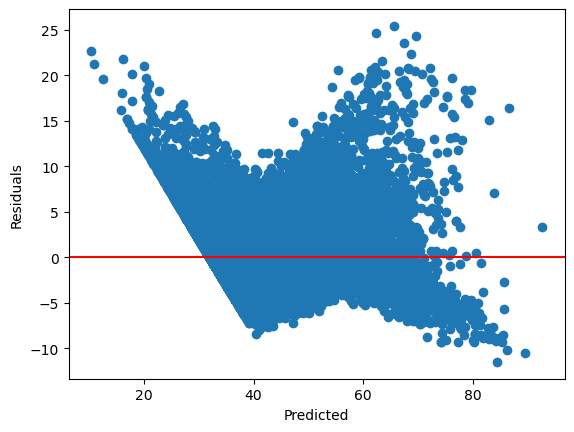

In [34]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

residuals = y_test - preds
plt.figure()
plt.scatter(preds, residuals)
plt.axhline(0, color="red")
plt.xlabel("Predicted")
plt.ylabel("Residuals")

[Your inferences here:]


#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>


Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [35]:
# Compare the scaled vs unscaled features used in the final model

coef_scaled = final_model.coef_
# Get the feature indices that were selected
selected_indices = best_model.support_
# Use the same indices for the scaler
orig_coef = coef_scaled / scaler.scale_[selected_indices]

# Create a DataFrame to display the coefficients
feature_imp = pd.DataFrame(
    {"feature": selected_features, "coef_scaled": coef_scaled, "coef_orig": orig_coef}
).sort_values(by="coef_orig", key=lambda x: abs(x), ascending=False)
feature_imp.reset_index(drop=True, inplace=True)
print(feature_imp)

                     feature  coef_scaled  coef_orig
0                  isWeekend     0.575417   1.210085
1             order_protocol    -1.016275  -0.671614
2                  market_id    -0.822458  -0.618004
3         num_distinct_items     0.861531   0.529841
4                   distance     4.168377   0.476325
5      total_onshift_dashers   -12.522640  -0.362216
6   total_outstanding_orders    18.323308   0.347207
7                 order_hour    -2.158153  -0.248714
8         total_busy_dashers    -4.539890  -0.141001
9                total_items    -0.116608  -0.042758
10                  subtotal     2.321474   0.001268
11            max_item_price     0.358377   0.000640


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.


In [36]:
# Analyze the effect of a unit change in a feature, say 'total_items'

# Get the coefficient for total_items from the feature importance DataFrame
total_items_coef = feature_imp[feature_imp['feature'] == 'total_items']['coef_orig'].values[0]

# Example: Effect of adding one more item to an order
print(f"Effect of adding one more item to an order:")
print(f"Change in delivery time: {total_items_coef:.2f} minutes")

# Get the mean and std of time_taken for comparison
mean_time = y_train.mean()
print(f"\nMean delivery time: {mean_time:.2f} minutes")
print(f"One item change represents {(total_items_coef/mean_time)*100:.2f}% of mean delivery time")

Effect of adding one more item to an order:
Change in delivery time: -0.04 minutes

Mean delivery time: 46.20 minutes
One item change represents -0.09% of mean delivery time


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.


Include conclusions in your report document.


## Subjective Questions <font color = red>[20 marks]</font>


Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.


#### Subjective Questions based on Assignment


##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?


**Answer:**

>

- Yes. The categorical variables include:
  - `store_primary_category` (e.g., fast food, dine-in)
  - `order_protocol` (e.g., Porter app, call-in)
  - `market_id` (market/region identifier)
  - `order_dow` (day of week)
  - `is_weekend` (binary weekend indicator)

From exploratory analysis:
- Weekend deliveries (`is_weekend = 1`) tended to have slightly longer delivery times on average, likely due to higher order volumes.
- Certain `store_primary_category` values (e.g., fast food) showed quicker average times compared to dine-in, suggesting meal preparation time impacts delivery.
- Different `order_protocol` modes showed minimal variation once other factors were controlled, indicating protocol had a smaller effect.
- Geographic differences (`market_id`) introduced variability consistent with region-specific traffic patterns and distances.


---


##### **Question 2.** <font color = red>[1 marks]</font> <br>

What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**

- `test_size = 0.2` means that 20% of the dataset is reserved as the test set (held-out data for model evaluation), while the remaining 80% is used for training the model.

---


##### **Question 3.** <font color = red>[1 marks]</font> <br>

Looking at the heatmap, which one has the highest correlation with the target variable?


**Answer:**

>
- Among all features, `distance` shows the highest positive correlation with `time_taken`, indicating longer distances lead to longer delivery times.

---


##### **Question 4.** <font color = red>[2 marks]</font> <br>

What was your approach to detect the outliers? How did you address them?


**Answer:**

>
- **Detection:** We used boxplots for key numerical features (including `time_taken`) to visually identify extreme values. We also inspected the 1st and 99th percentiles to find unusually low or high values.
- **Handling:** We clipped each numeric feature to the range between its 1st and 99th percentile. This approach capped extreme values to reduce the influence of outliers while preserving most of the data distribution.

---


##### **Question 5.** <font color = red>[2 marks]</font> <br>

Based on the final model, which are the top 3 features significantly affecting the delivery time?


**Answer:**

>
Based on the magnitude of the coefficients (on the original scale):
1. `distance` (larger distances increase delivery time)
2. `total_outstanding_orders` (more pending orders correlate with delays)
3. `total_items` (orders with more items marginally extend delivery time)

These features had the largest absolute effects on `time_taken` in the final regression model.

---


#### General Subjective Questions


##### **Question 6.** <font color = red>[3 marks]</font> <br>

Explain the linear regression algorithm in detail


**Answer:**

>

Linear regression models the relationship between input features and a continuous target by fitting a straight-line (or hyperplane in multiple dimensions) that best predicts the target values.

- **Model Structure:** Predicts output as a weighted sum of inputs plus an intercept (bias).
- **Objective:** Finds the set of weights that minimizes the average squared difference between predicted and actual values.
- **Solution Methods:**
  - **Normal Equation:** Direct algebraic method to compute optimal weights in one step.
  - **Gradient Descent:** Iterative approach that updates weights in the direction that reduces error until convergence.
- **Interpretation:** Each weight indicates how much the target changes for a one-unit change in the corresponding feature, holding others constant.
- **Key Assumptions:**
  - Relationships are linear in parameters.
  - Errors (residuals) are independent and have constant variance.
  - No strong multicollinearity among features.
  - Residuals are approximately normally distributed for inference purposes.

---


##### **Question 7.** <font color = red>[2 marks]</font> <br>

Explain the difference between simple linear regression and multiple linear regression


**Answer:**

>
- **Simple Linear Regression:** Uses a single predictor to model the target as a straight line.
- **Multiple Linear Regression:** Uses two or more predictors to model the target as a flat surface (hyperplane) in higher-dimensional space.

The core principle remains the same: fit a linear combination of inputs to minimize prediction error.

---


##### **Question 8.** <font color = red>[2 marks]</font> <br>

What is the role of the cost function in linear regression, and how is it minimized?


**Answer:**

>
- The **cost function** quantifies the average prediction error across all training samples, usually as Mean Squared Error.
- **Minimization Techniques:**
  - **Normal Equation:** Computes the exact optimal weights by solving a system of equations.
  - **Gradient Descent:** Iteratively updates weights by moving them in the direction that reduces the cost until convergence

---


##### **Question 9.** <font color = red>[2 marks]</font> <br>

Explain the difference between overfitting and underfitting.


**Answer:**

>
- **Underfitting:** Model too simple to capture underlying patterns; both training and test errors are high.
- **Overfitting:** Model too complex and captures noise in the training data; training error is low but test error is high.

A balanced model generalizes well, with similar performance on training and test sets.

---


##### **Question 10.** <font color = red>[3 marks]</font> <br>

How do residual plots help in diagnosing a linear regression model?


**Answer:**

>
Residual plots show the differences between actual and predicted values:
- **Linearity Check:** Random scatter indicates a good linear fit; patterns suggest missing non-linear relationships.
- **Homoscedasticity:** Constant spread of residuals means uniform variance; funnel shapes indicate non-constant variance that may require transformation.
- **Independence:** No clear structures over sequence or time suggests residuals are independent, validating model assumptions.